# $$Neuron~~and~~Neural~~Networks$$

# **Definition**

## **Neuron**

### **Defintion**

Airplane mimics how birds fly, Shinkansen mimics the kingfisher's sleak beak; by mimicking the nature, humans have advanced the technology. is called biomimicry. In machine learning, since our goal is to make machines that can think like humans, we mimic neurons which are the building blocks for the brain and that is how **Neural Network** come along. 

But first, let's find out what are neurons and how they can be applied to machine learning (Click <a href="https://kite.com/wp-content/uploads/2019/05/image8.png">here</a> to find out the structure of neurons).
A neuron uses **dendrite** to take electricity pulses (called **spikes**), process in the nucleus to give the outputs (**axons**). 

Similarly, a neuron cell is basically computational units that takes input features $x_1, x_2, ..., x_n$ (dendrites) as electrical inputs that are channeled to outputs (axons). In this model, our $x_0$ input node and $a^{(i)}_0$ is sometimes called the **bias unit**, which is always equal to $1$. 

### **Usage in Neural Networks**

In neural network, neurons are nodes containing numbers called **activation** between $0$ and $1$, sort of analogous to how neurons in the brain can be active or inactive. You can imagine them like <a href="https://www.3blue1brown.com/content/lessons/2017/neural-networks/activations.svg">this</a>.

## **Neural Networks**

### **Definition**

A neural network are composed of many layers of neurons, hence the name multilayer perceptrons. <a href="https://victorzhou.com/media/nn-series/network.svg">Here</a> is the illustration of a simple 4-layer neural network. This is the foundation for many other deep learning models like **Convolutional** and **Recurrent Neural Networks**.

The first layer (layer $0$) is also called the **input layer**, which outputs will be given into another node in intermediate layers (layer $1, 2, 3, \ldots, n - 1$) (called the **hidden layers**). Finally, the last layer outputs the hypothesis function, which is called the **output layer**. Since there are no cycles or loops in the network and the flow of information only goes forward from input layer, through hidden layers and to the output layer. This is called **Feedforward Network** or **Forward Propagation**.

We label these intermediate layer nodes $a^{(2)}_0, a^{(2)}_1, ..., a^{(2)}_n$ and called them **activation units**, in which $a^{(2)}_0$ is also a **bias unit**.

Some notation explained:
$$a^{(i)}_j = \text{"activation" of unit $j$ in layer $i$}.$$ 
$$\Theta^{(i)} = \text{matrix of weights controlling function mapping from layer $i$ to layer $i+1$}.$$
$$\theta^{(i)}_{jk} = \text{the weight to map the $j^{th}$ unit in layer $i$ to the $k^{th}$ unit in the $i+1$ layer.}$$
From this, we have some special cases:

* $a^{(0)}$ is the input layer.

* $a^{(i)}_0 = 1$ since this is the bias node.

* $\theta^{(i)}_{j0} = b^{(i)}_j$ ($b$ stands for **bias**).

# **Forward Propagation**

If we had only one hidden layer, it would look like this:
$$[x_0x_1x_2x_3] \rightarrow [a^{(1)}_1a^{(1)}_2a^{(1)}_3] \rightarrow f_\theta(x)$$
For each **activation** nodes, the values are obtained as follows:
$$a^{(1)}_1 = g(\theta^{(0)}_{01}x_0 + \theta^{(0)}_{11}x_1 + \theta^{(0)}_{21}x_2 + \theta^{(0)}_{31}x_3)$$
$$a^{(1)}_2 = g(\theta^{(0)}_{02}x_0 + \theta^{(0)}_{12}x_1 + \theta^{(0)}_{22}x_2 + \theta^{(0)}_{32}x_3)$$
$$a^{(1)}_3 = g(\theta^{(0)}_{03}x_0 + \theta^{(0)}_{13}x_1 + \theta^{(0)}_{23}x_2 + \theta^{(0)}_{33}x_3)$$
The next and the last layer (layer $2$) will be the output:
$$f_\theta(x) = a^{(2)}_1 = g(\theta^{(1)}_{01}x_0 + \theta^{(1)}_{11}x_1 + \theta^{(1)}_{21}x_2 + \theta^{(1)}_{31}x_3)$$
To sum up:
$$z^{(i+1)}_j = \sum_{k=0}^{n}{\theta^{(i)}_{jk}x_k}$$
$$a^{(i+1)}_j = g(z^{(i+1)}_j)$$
$$a^{(i+1)}_j = g(\theta^{(i)}_{0j}x_0 + \theta^{(i)}_{1j}x_1 + \theta^{(i)}_{2j}x_2 + ... + \theta^{(i)}_{nj}x_n)$$
In which $g(x)$ is the **activation** function.

We apply each row of the parameters to our inputs to obtain the value for one activation node. Our hypothesis output is the logistic function applied to the sum of the values of our activation nodes, which have been multiplied by yet another parameter matrix $\theta^{(1)}$ containing the weights for our second layer of nodes.

In this example, we can see that from the first layer to the second layer, the $\theta$ is a $3 \times 4$ dimensions matrix, since there are $3$ nodes in the second layer and four $\theta$ corresponding to $3$ input nodes and $1$ bias node. 

Generally speaking, to determine the dimensions of these matrices of weights, we will apply this formula: **if network has** $s_j$ **units in layer** $j$ **and** $s_{j+1}$ **units in layer** $j+1$**, then** $\theta^{(j)}$ **will be of dimensions** 
$$s_{j+1} \times (s_j + 1)$$ 
The $+1$ in $s_j + 1$ comes from the addition in $\theta^{(i)}$ of the bias nodes: $x_0$ and $\theta^{(i)}_0$. In other words, the output nodes will not include the bias nodes while the inputs will.

## **Vectorized Implementation**

To implement this better, we can define a new variable $z^{(i)}_j$ that encompasses the parameters inside our activation function $g(x)$. So now our activation units will now be: 
$$a^{(1)}_1 = g(z^{(1)}_1)$$
$$a^{(1)}_2 = g(z^{(1)}_2)$$
$$a^{(1)}_3 = g(z^{(1)}_3)$$
Generally:
$$a^{(i)}_j = g(z^{(i)}_j)$$

This means, for layer $i = 1$ and node $j$, the value $z$ is now replacing:
$$z^{(1)}_j = \theta^{(1)}_{0j}x_0 + \theta^{(1)}_{1j}x_1 + \theta^{(1)}_{2j}x_2 + \ldots + \theta^{(1)}_{nj}x_n$$

The vector $x$ can be represents as:
$$x = 
\begin{bmatrix} 
x_0 \\ 
x_1 \\ 
x_2 \\ 
\vdots \\ 
x_n 
\end{bmatrix}$$

but since the input $x$ can be considered as activation units of the first layer ($i=0$) $x = a^{(0)}$ so we can generalize all nodes in the neural network as:
$$a^{(i)} = 
\begin{bmatrix} 
a^{(i)}_0 \\ 
a^{(i)}_1 \\ 
a^{(i)}_2 \\ 
\vdots \\ 
a^{(i)}_n 
\end{bmatrix}$$

Vectorizing $a^{(i)}$ and $z^{(i)}$ and annotate $n, m$ as the number of node in each layer, we obtain:
$$a^{(i)} = 
\begin{bmatrix} 
    a^{(i)}_0 \\ 
    a^{(i)}_1 \\ 
    a^{(i)}_2 \\ 
    \vdots \\ 
    a^{(i)}_n 
\end{bmatrix}~~~~
z^{(i)} = 
\begin{bmatrix} 
    z^{(i)}_1 \\ 
    z^{(i)}_2 \\ 
    \vdots \\ 
    z^{(i)}_m 
\end{bmatrix}~~~~
\Theta^{(i)} = 
\begin{bmatrix} 
     \theta^{(i)}_{01} & \theta^{(i)}_{11} & \theta^{(i)}_{21} & \cdots & \theta^{(i)}_{j1} & \cdots & \theta^{(i)}_{n1} \\
     \theta^{(i)}_{02} & \theta^{(i)}_{12} & \theta^{(i)}_{22} & \cdots & \theta^{(i)}_{j2} & \cdots & \theta^{(i)}_{n2} \\
     \vdots            & \vdots            & \vdots            & \ddots & \vdots            & \cdots & \vdots            \\
     \theta^{(i)}_{0k} & \theta^{(i)}_{1k} & \theta^{(i)}_{2k} & \cdots & \theta^{(i)}_{jk} & \cdots & \theta^{(i)}_{nk} \\
     \vdots            & \vdots            & \vdots            & \ddots & \vdots            & \cdots & \vdots            \\
     \theta^{(i)}_{0m} & \theta^{(i)}_{1m} & \theta^{(i)}_{2m} & \cdots & \theta^{(i)}_{mk} & \cdots & \theta^{(i)}_{nm}
\end{bmatrix}$$
You can see that the $\Theta^{(i)}$ matrix have $(n+1)$ columns and $m$ rows ($m \times (n+1)$ dimensions), since $n$ is the number of nodes in the current layer $(t)$ and $m$ is the number of nodes in the next layer $(t+1)$ so this proves our formula from before. 

With these matrices, we can simplify the complex computation for $z^{(i)}$ as:
$$z^{(i)} = \Theta^{(i-1)}a^{(i-1)}$$

We are multiplying our matrix $\Theta^{(i-1)}$ with dimensions $m \times (n+1)$ by our vector $a^{(i-1)}$ with dimensions $(n+1) \times 1$. This gives us the vector $z^{(i)}$ with dimensions $m \times 1$. Now we can obtain the vector of our activation nodes by applying the activation function for the $z$ vector layer $i$ as:
$$a^{(i)} = g(z^{(i)})$$
We can then add a bias unit (= 1) to layer $j$ after we have computated $a^{(i)}$. This will be element $a^{(i)}_0 = 1$. So our final hypothesis, let's compute another $z$ vector:
$$z^{(i+1)} = \Theta^{(i)}a^{(i)}$$
Since we only have 1 node in this layer so the $\Theta^{(i)}$ will only have $1 \times (m + 1)$, then multiplied that by a column vector $a^{(i)}$ so our result is a single number. Then our final result is:
$$f_\theta(x) = a^{(i+1)} = g(z^{(i+1)})$$
Notice that in this last step, between layer $i$ and layer $i+1$, we are doing exactly the same thing as we did in logistic regression. Adding all these intermediate layers in neural networks allows us to more elegantly produce interesting and more complex non-linear hypotheses.

## **Examples**

### **AND Logical Operator**

By applying neural networks, we can predict the result of $x_1$ AND $x_2$, which is only **TRUE** when both of $x_1$ and $x_2$ are $1$.

|$x_1$|$x_2$|Output|
|:---:|:---:|:----:|
| $0$ | $0$ | $0$  |
| $0$ | $1$ | $0$  |
| $1$ | $0$ | $0$  |
| $1$ | $1$ | $1$  |

Since it is quite simple, we can use just $1$ layer of $3$ neurons.

The graph of our functions will look like this:
$$\begin{bmatrix} x_0 \\ x_1 \\ x_2 \end{bmatrix} \rightarrow \begin{bmatrix} g(z^{(1)}) \end{bmatrix} = f_\theta(x)$$
with $x_0 = 1$ is our bias unit.

Since there are only 1 layer, we only need 1 row of $\theta$, which is:
$$\Theta^{(0)} = \begin{bmatrix} -30 & 20 & 20 \end{bmatrix}$$
So now our $z^{(1)} = \Theta^{(0)}X = \theta^{(0)}_{01}x_0 + \theta^{(0)}_{11}x_1 + \theta^{(0)}_{21}x_2$. Then our hypotheses will become:
$$f_\theta(x) = g(\Theta^{(1)}X) = g(\theta^{(0)}_{01}x_0 + \theta^{(0)}_{11}x_1 + \theta^{(0)}_{21}x_2)$$

Now it is capable of predicting the result of the AND operator. For example:

|$x_1$|$x_2$|Output|
|:---:|:---:|:----:|
| $0$ | $0$ | $g(-30) \approx 0$ |
| $0$ | $1$ | $g(-10) \approx 0$ |
| $1$ | $0$ | $g(-10) \approx 0$ |
| $1$ | $1$ | $g(10) \approx 1$  |

This perfectly correspond to the output of a normal AND logical operator.

### **OR Logical Operator**

Similarly, we can predict the result of $x_1$ OR $x_2$, which is **TRUE** when at least $x_1$ or $x_2$ is $1$.

|$x_1$|$x_2$|Output|
|:---:|:---:|:----:|
| $0$ | $0$ | $0$  |
| $0$ | $1$ | $1$  |
| $1$ | $0$ | $1$  |
| $1$ | $1$ | $1$  |

And we also use $1$ layer of $3$ neurons.

Our $\Theta$ matrix will now contains:
$$\Theta^{(0)} = \begin{bmatrix} -10 & 20 & 20 \end{bmatrix}$$
And our hypotheses will become:
$$f_\theta(x) = g(\Theta^{(0)}X) = g(\theta^{(0)}_{01}x_0 + \theta^{(0)}_{11}x_1 + \theta^{(0)}_{21}x_2)$$

|$x_1$|$x_2$|Output|
|:---:|:---:|:---:|
| $0$ | $0$ | $g(-10) \approx 0$  |
| $0$ | $1$ | $g(10) \approx 1$   |
| $1$ | $0$ | $g(10) \approx 1$   |
| $1$ | $1$ | $g(30) \approx 1$   |


# **Cost Function**

## **Definition**

Since every neurons in neural networks is technically one **Logistic Regression** function, that's why the cost function of a neural network is quite complicated. But first, let's define some terms we will use later:
* $L$ = total number of layers in the network

* $s_l$ = number of units (not counting bias unit) in layer $l^{th}$

* $K$ = number of output units/classes

Let's start from **Logistic Regression**, recall that its **Regularized Cost Function** is defined as:
$$J(\theta) = 
-\frac{1}{m} \sum^{m}_{i=1}{[(y^{(i)}\log{f_\theta(x^{(i)})}) + (1 - y^{(i)})\log{(1 - f_\theta(x^{(i)}))}]} + \frac{\lambda}{2m} \sum^{n}_{j=1}{\theta^{2}_j}$$

There are 2 main differences between **Neural Networks** and **Logistic Regression**:
* Neural Networks usually classify multiple classes (require multiple nodes), while Logistic Regression usually classify two classes (require one node).

* Neural Networks consist of multiple layers.

For the first difference, I want to clarify something here: Neural Networks **does** used in Binary Classification problems, but since I am trying to generalize for other cases where it's the Multiclass Classification problem. Hence, in our Neural Networks' Cost Function, we have to include the "error" of the output nodes correspond to its respective classes. Now, our Cost Function for Neural Networks will be added another sum $\sum$ for each class $k$:
$$J(\theta) = 
-\frac{1}{m} \sum^{m}_{i=1} \sum^{K}_{k=1}{[(y^{(i)}\log{(f_\theta(x^{(i)}))_k}) + (1 - y^{(i)})\log{(1 - (f_\theta(x^{(i)}))_k)}]} + 
\frac{\lambda}{2m} \sum^{n}_{j=1}{\theta^{2}_j}$$

In the function, $k$ denotes the node's index in the output nodes vector so $(f_\theta(x^{(i)}))_k$ denotes the output value for each node. The double sum $\sum \sum$ simply adds up the **Logistic Regression** costs calculated for each node in the output layer.

For our second difference, this mainly is used to understand the intuition for regularizing weights matrices in Neural Networks. Because there are multiple layers, each containing a matrix of weights $\Theta^{(l)}$ so we have to dive deeper into each layer of the network. Moreover, each layer contains a certain amount of inputs $a^{(i)}$ and outputs $z^{(i)}$ so we can get all the weights' indices by using the number of units in each layer $s_l$. So now, our fully implemented Cost Function for Neural Networks will be:
$$J(\theta) = 
-\frac{1}{m} \sum^{m}_{i=1} \sum^{K}_{k=1}{\left[(y^{(i)}\log{(f_\theta(x^{(i)}))_k}) + (1 - y^{(i)})\log{(1 - (f_\theta(x^{(i)}))_k)}\right]} + 
\frac{\lambda}{2m} \sum^{L}_{l=0} \sum^{s_l}_{b=1} \sum^{s_l + 1}_{a=1} {(\theta^{(l)}_{a,b})^2}$$

In the regularizing part, $a$ stands for the index of the input units, while $b$ denotes the index of the output units. That's why we do not start $a$ at $0$ because we do not want to regularize our bias unit ($\theta^{(i)}_{0k}$ is the bias' weights column vector of layer $i^{th}$). The triple sum $\sum \sum \sum$ in this part simply adds up the squares of all the individual $\theta$ in the entire network.

In **Logistic Regression**, to minimize our Cost Function we use Gradient Descent. However, with the complexity of the Neural Networks, we cannot use the normal way to compute the gradient. Hence, we have to use another algorithm, called ***Backpropagation***.

# **Backpropagation**

**Backpropagation** is Neural Network terminology for minimizing our **Cost Function**, just like what we were doing with gradient descent in **Logistic** and **Linear Regression**. Our goal is to compute $\underset{\Theta}{\text{min}}~J(\Theta)$ as always and to achieve that, we must come up with a way to compute the gradient 
$$\frac{\partial}{\partial \theta^{(l)}_{i,j}} J(\Theta)$$ 
because it points to the minima of the Cost Function. However, as I said before, Neural Network cannot compute the gradient easily because of its complexity. That's why we come up with a new algorithm to minimize our cost. The algorithm is as follows:

1. Given a training set $\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(m)}, y^{(m)} )\}$
2. Set $\Delta^{(l)}_{i,j} = 0$ (for all $l, i, j$)
3. For i=1 to m
> * Set $a^{(1)} = x^{(i)}$
> * Perform forward propagation to calculate $a^{(l)}$ for $l = 2, 3, \ldots, L$
> * Use $y^{(i)}$, compute the error for the last layer $L$: $\delta^{(L)} = a^{(L)} - y^{(i)}$
> * Propagate backwards to calculate $\delta^{(L-1)}, \delta^{(L-2)}, \ldots, \delta^{(1)}$ using this formula: 
> $$\delta^{(l)} = ((\Theta^{(l)})^T\delta^{(l+1)}) \odot a^{(l)} \odot (1 - a^{(l)})$$
> Given that $g'(z^{(l)}) = a^{(l)} \odot (1 - a^{(l)})$ ($\odot$ denotes element - wise matrix multiplication) then the formula becomes:
> $$\delta^{(l)} = ((\Theta^{(l)})^T\delta^{(l+1)}) \odot g'(z^{(l)})$$
> * Calculate the new $\Delta$ matrix using either $\Delta^{(l)}_{i,j} = \Delta^{(l)}_{i,j} + a^{(l)}_i \delta^{(l+1)}_j$ or vectorized form: $\Delta^{(l)} = \Delta^{(l)} + \delta^{(l+1)} (a^{(l)})^T$
> * Using the newly calculated $\Delta$ matrix, we can accumulate it and add it to our $D$ matrices, which will be used later to calculate the gradient $\frac{\partial}{\partial \theta^{(l)}_{i,j}} J(\Theta)$.
> $$D^{(l)}_{i,j} = \frac{1}{m} \left( \Delta^{(l)}_{i,j} + \lambda \theta^{(l)}_{i,j} \right)~~\text{if $i \neq 0$}$$
> $$D^{(l)}_{0,j} = \frac{1}{m} \Delta^{(l)}_{0,j}$$
> With $\lambda$ is the regularizing constant, thus we only add it when the weights is not from the bias ($i \neq 0$).
4. The $D$ matrices we obtain is the gradient matrices:
$$\frac{\partial}{\partial \theta^{(l)}_{ij}} J(\Theta) = D^{(l)}_{ij}$$

# **Demo**

Nowadays, everyone uses machine learning libraries such as **Tensorflow**, **PyTorch**,... to skip the tedious tasks and complex algorithm when making a neural network model to have more time for the actual work. So for the demo, I am going to use Tensorflow to implement a simple Neural Network to classify the Fashion MNIST dataset. First let's import all necessary libraries.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


## **Import the Fashion MNIST dataset**

This guide uses the <a href="https://github.com/zalandoresearch/fashion-mnist" target=_blank>Fashion MNIST</a> dataset which contains $70,000$ grayscale images in $10$ categories. The images show individual articles of clothing at low resolution ($28 \times 28$ pixels).

Fashion MNIST is intended as a drop-in replacement for the classic <a href="http://yann.lecun.com/exdb/mnist/" target=_blank>MNIST</a> dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, $60,000$ images are used to train the network and $10,000$ images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are $28 \times 28$ NumPy arrays, with pixel values ranging from $0$ to $255$. The *labels* are an array of integers, ranging from $0$ to $9$. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## **Explore the data**

Let's explore the format of the dataset before training the model. The following shows there are $60,000$ images in the training set, with each image represented as $28 \times 28$ pixels:

In [4]:
train_images.shape

(60000, 28, 28)

Likewise, there are $60,000$ labels in the training set:

In [5]:
len(train_labels)

60000

Each label is an integer between $0$ and $9$:

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are $10,000$ images in the test set. Again, each image is represented as $28 \times 28$ pixels:

In [7]:
test_images.shape

(10000, 28, 28)

And the test set contains $10,000$ images labels:

In [8]:
len(test_labels)

10000

## **Data Preprocessing**

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of $0$ to $255$:

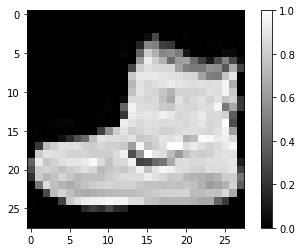

In [11]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of $0$ to $1$ before feeding them to the neural network model. To do so, divide the values by $255$. It's important that the training set and the testing set be preprocessed in the same way:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first $25$ images from the training set and display the class name below each image.

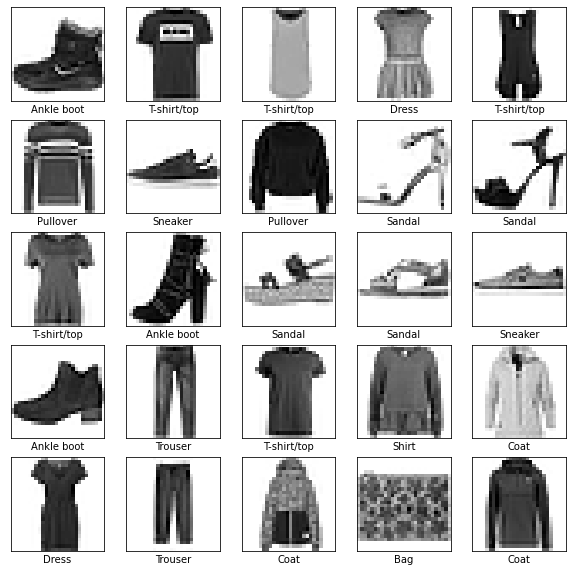

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## **Build the model**

Building the neural network requires configuring the layers of the model, then compiling the model.

### **Set up the layers**

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-03-23 00:30:46.903122: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-23 00:30:46.903399: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of $28 \times 28$ pixels) to a one-dimensional array (of $28 \times 28 = 784$ pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has $128$ nodes (or neurons). The second (and last) layer returns a logits array with length of $10$. Each node contains a score that indicates the current image belongs to one of the $10$ classes.

### **Compile the model**

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### **Train the model**

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.

### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


2022-03-23 00:31:02.884243: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-23 00:31:03.129449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 18s 9ms/step - loss: 1.0823 - accuracy: 0.6642
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6409 - accuracy: 0.7682
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5668 - accuracy: 0.7959
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5250 - accuracy: 0.8125
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4967 - accuracy: 0.8250
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4772 - accuracy: 0.8326
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4618 - accuracy: 0.8379
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4504 - accuracy: 0.8414
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4406 - accuracy: 0.8448
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4328

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about $0.91$ (or $91\%$) on the training data.

### **Evaluate accuracy**

Next, compare how the model performs on the test dataset:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2022-03-23 00:33:23.969722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 2s - loss: 0.4636 - accuracy: 0.8355 - 2s/epoch - 6ms/step

Test accuracy: 0.8355000615119934


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### **Make predictions**

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

2022-03-23 00:33:25.986509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [20]:
predictions[0]

array([4.9404105e-07, 3.0311547e-08, 5.7057532e-06, 3.9410943e-06,
       3.6708266e-06, 1.0730075e-01, 1.4136962e-05, 4.2625380e-01,
       3.9344965e-03, 4.6248305e-01], dtype=float32)

A prediction is an array of $10$ numbers. They represent the model's "confidence" that the image corresponds to each of the $10$ different articles of clothing. You can see which label has the highest confidence value:

In [21]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [22]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### **Verify predictions**

With the model trained, you can use it to make predictions about some images.

Let's look at the $0th$ image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of $100$) for the predicted label.

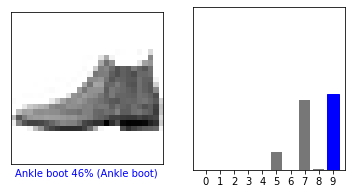

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

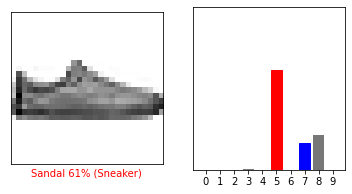

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

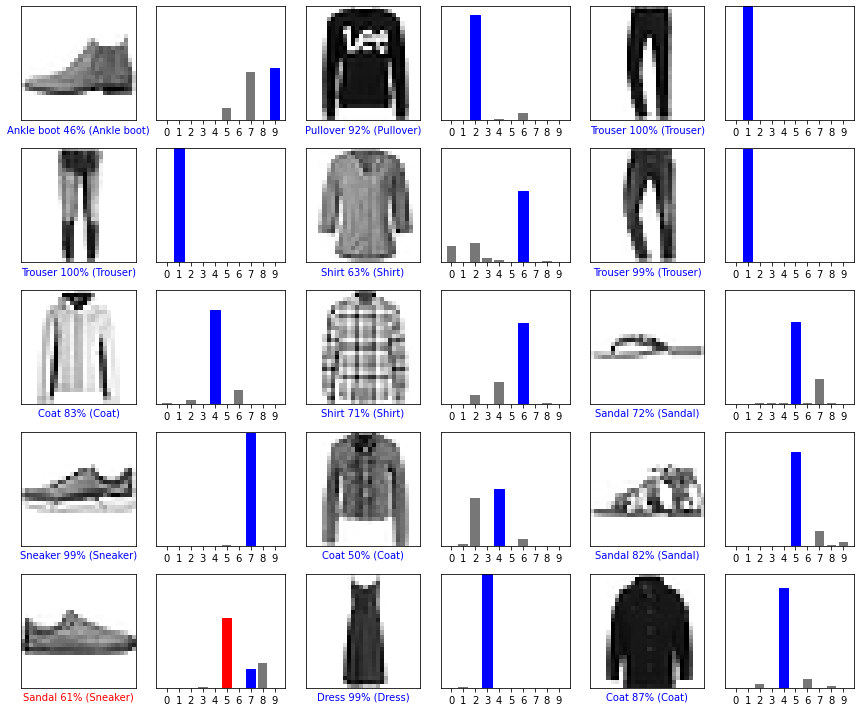

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### **Use the trained model**

Finally, use the trained model to make a prediction about a single image.

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.0424313e-04 4.3156278e-06 9.2350858e-01 8.3779581e-05 1.2265049e-02
  1.9696780e-10 6.3871108e-02 2.1539358e-15 6.2852530e-05 9.7499840e-13]]


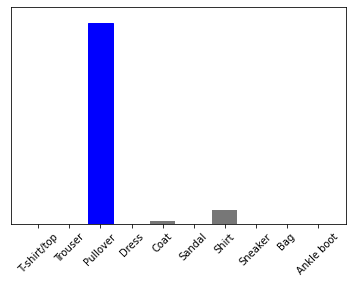

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.